In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import requests
import io



# Load the CSV file into a DataFrame
#boston_df = pd.read_csv(file_path)
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
boston_df

boston_df.info()
boston_df.describe()
boston_df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

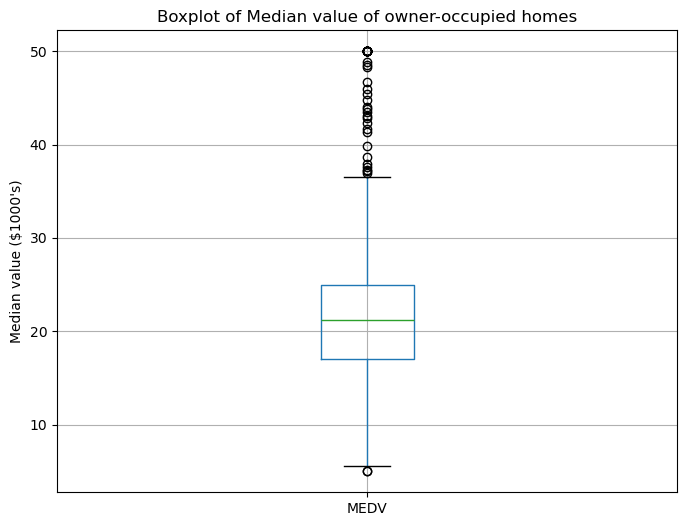

In [5]:
# Boxplot for "Median value of owner-occupied homes"
plt.figure(figsize=(8, 6))
boston_df.boxplot(column='MEDV')
plt.title('Boxplot of Median value of owner-occupied homes')
plt.ylabel('Median value ($1000\'s)')
plt.show()


<Figure size 800x600 with 0 Axes>

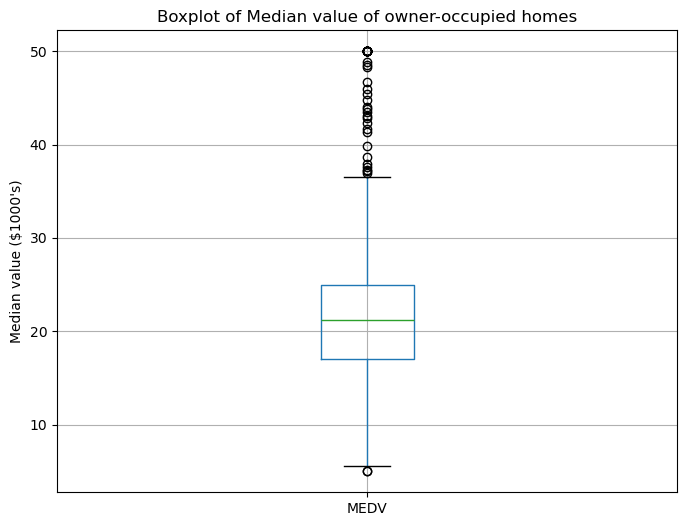

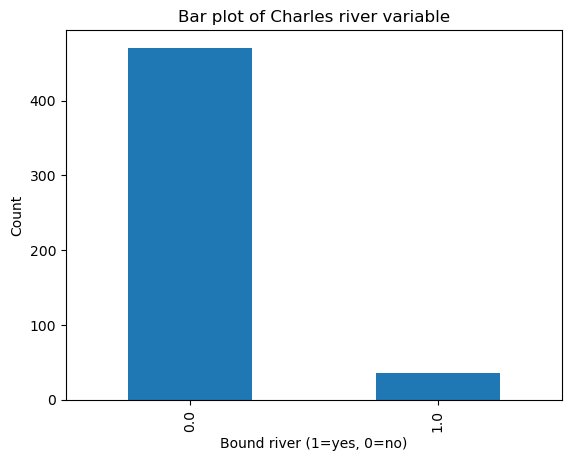

In [7]:
# Bar plot for the Charles river variable
plt.figure(figsize=(8, 6))# Boxplot for "Median value of owner-occupied homes"
plt.figure(figsize=(8, 6))
boston_df.boxplot(column='MEDV')
plt.title('Boxplot of Median value of owner-occupied homes')
plt.ylabel('Median value ($1000\'s)')
plt.show()

boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar plot of Charles river variable')
plt.xlabel('Bound river (1=yes, 0=no)')
plt.ylabel('Count')
plt.show()

In [8]:
# Discretizing AGE variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])



C:\Users\Desktop\AppData\Local\Temp\ipykernel_22852\3108201854.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = boston_df.groupby('AGE_group')['MEDV'].apply(list)


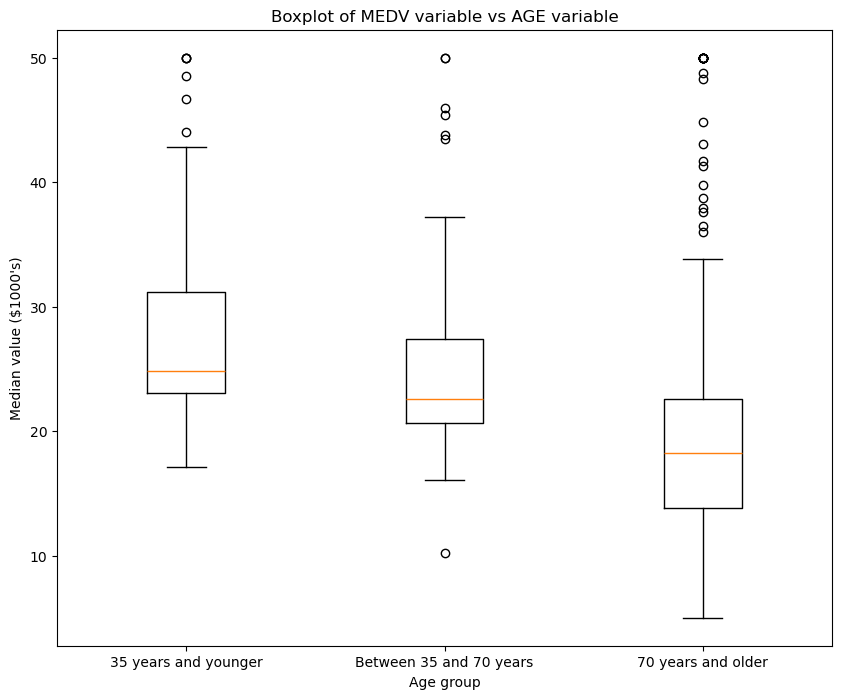

In [9]:
# Boxplot for MEDV variable vs AGE variable (Discretized)
# Discretizing AGE variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])
# Grouping data by AGE_group and extracting MEDV values
groups = boston_df.groupby('AGE_group')['MEDV'].apply(list)
# Plotting boxplots
plt.figure(figsize=(10, 8))
plt.boxplot(groups.values, labels=groups.index)
plt.title('Boxplot of MEDV variable vs AGE variable')
plt.xlabel('Age group')
plt.ylabel('Median value ($1000\'s)')
plt.show()

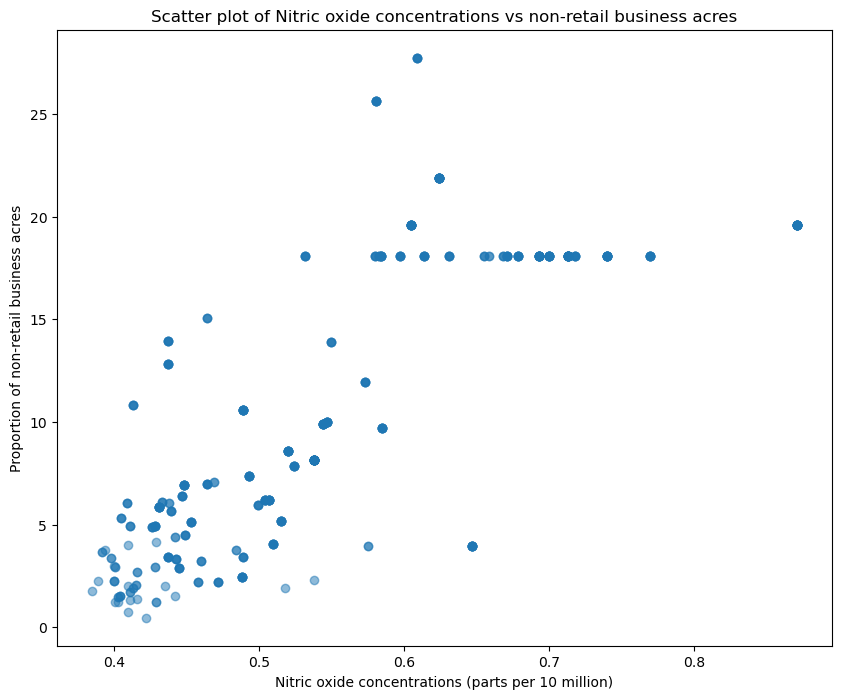

In [10]:


# Scatter plot for Nitric oxide concentrations vs proportion of non-retail business acres per town
plt.figure(figsize=(10, 8))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], alpha=0.5)
plt.title('Scatter plot of Nitric oxide concentrations vs non-retail business acres')
plt.xlabel('Nitric oxide concentrations (parts per 10 million)')
plt.ylabel('Proportion of non-retail business acres')
plt.show()

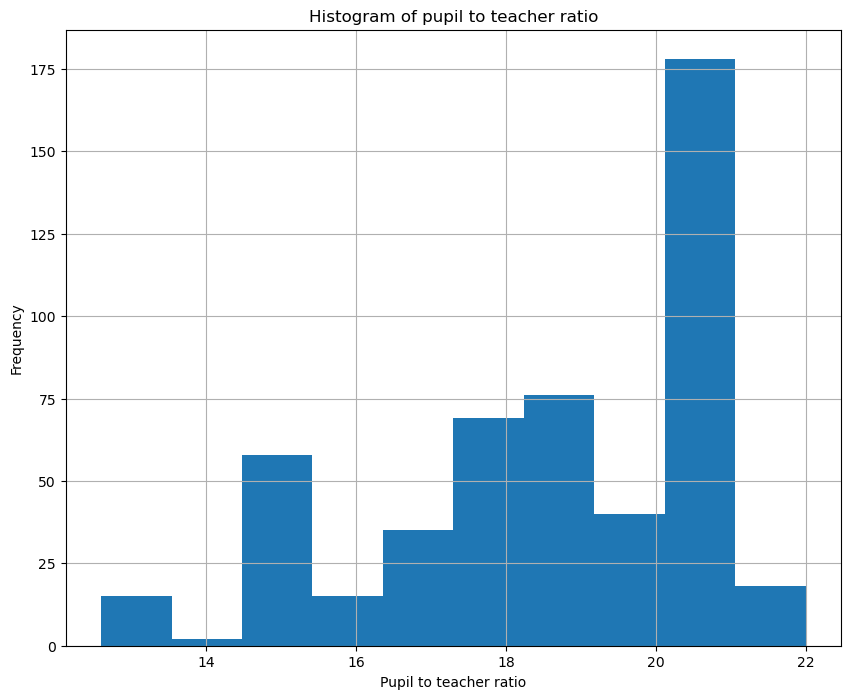

In [11]:
# Histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10, 8))
boston_df['PTRATIO'].hist(bins=10)
plt.title('Histogram of pupil to teacher ratio')
plt.xlabel('Pupil to teacher ratio')
plt.ylabel('Frequency')
plt.show()


T-test results:
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Conclusion: Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river and those not bounded by it.
ANOVA results:
F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Conclusion: Reject the null hypothesis. There is a difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).
Pearson Correlation results:
Correlation Coefficient: 0.7636514469209162
P-value: 7.913361061232958e-98
Conclusion: Reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


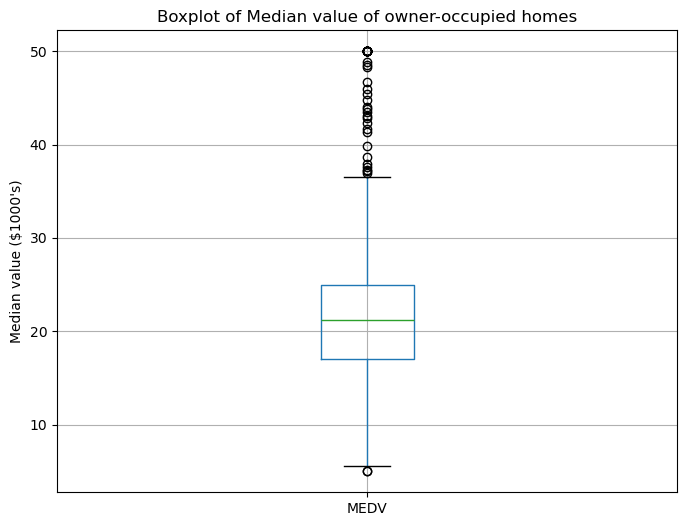

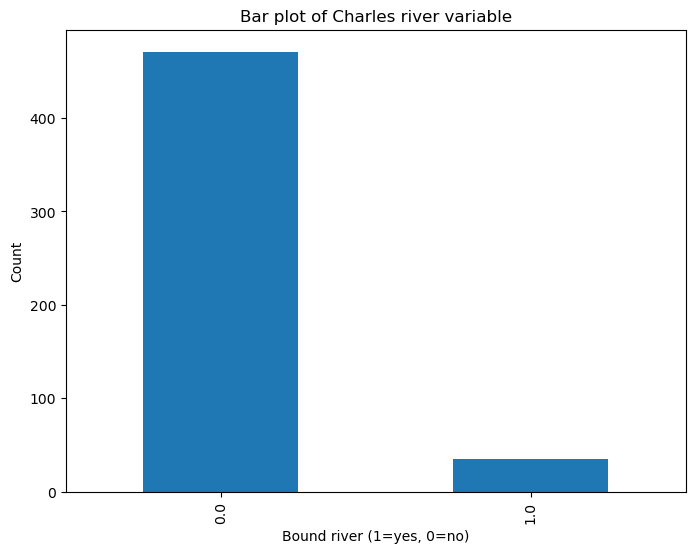

C:\Users\Desktop\AppData\Local\Temp\ipykernel_22852\241697353.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = boston_df.groupby('AGE_group')['MEDV'].apply(list)


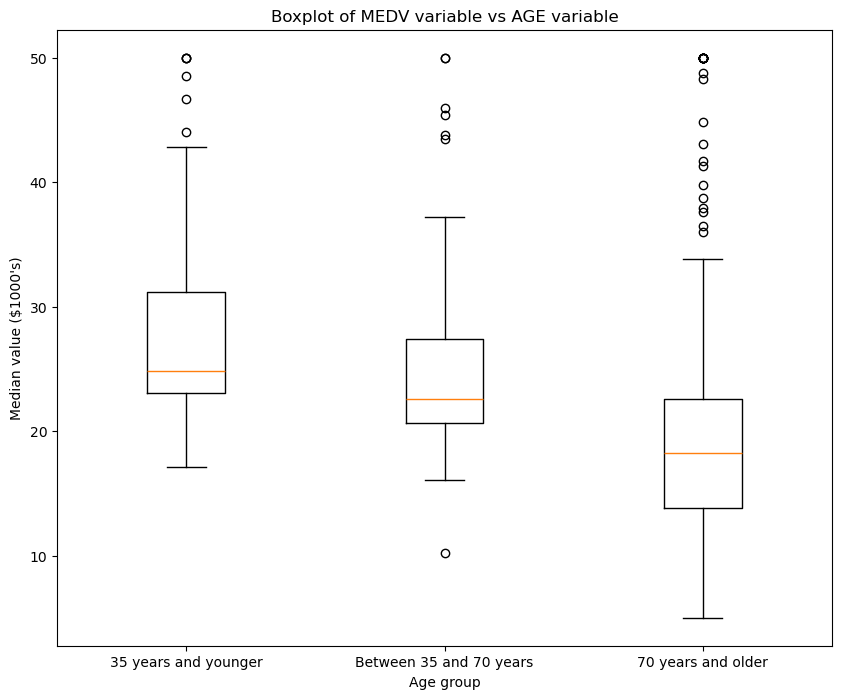

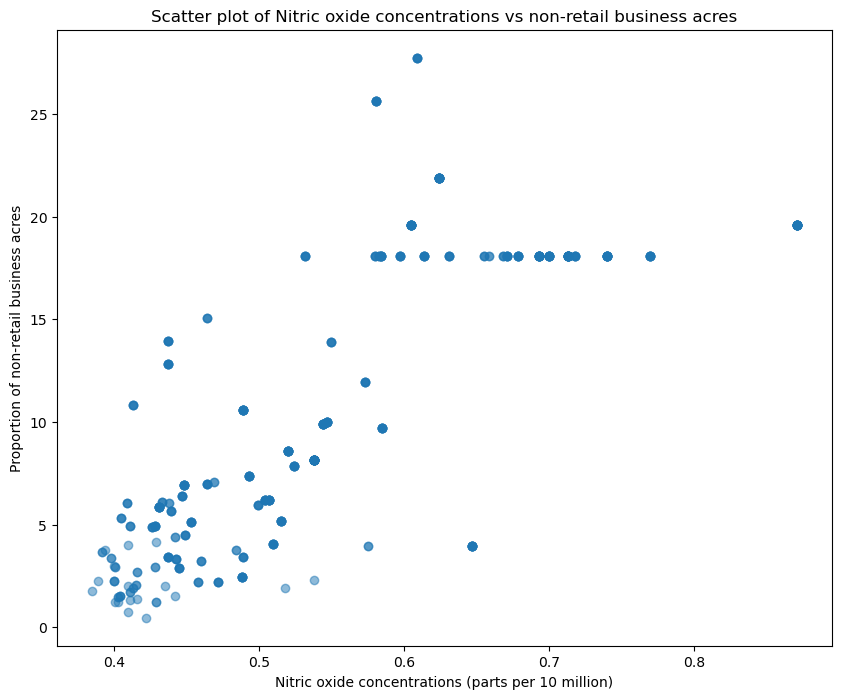

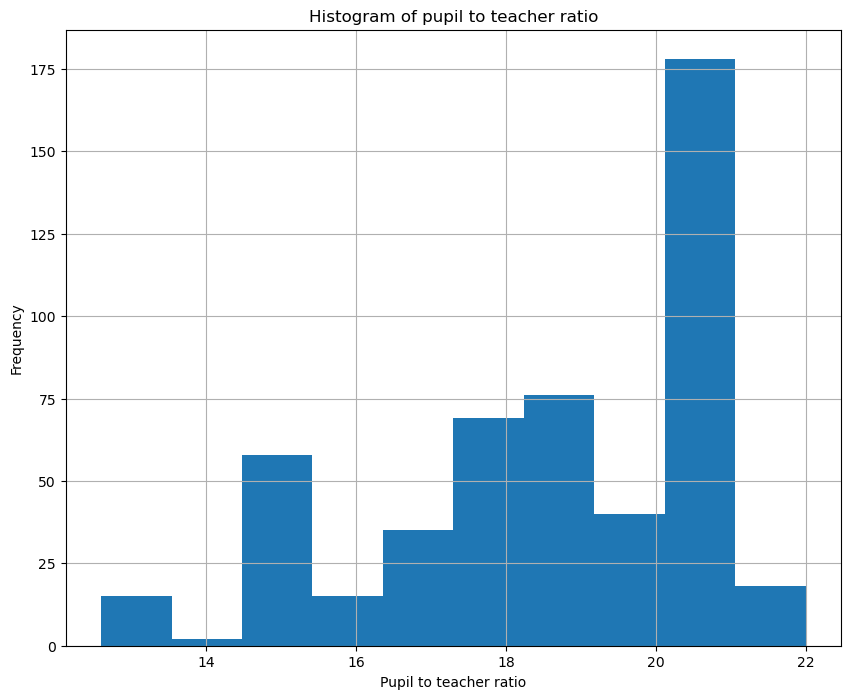

T-test results:
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Conclusion: Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river and those not bounded by it.
ANOVA results:
F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Conclusion: Reject the null hypothesis. There is a difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).
Pearson Correlation results:
Correlation Coefficient: 0.7636514469209162
P-value: 7.913361061232958e-98
Conclusion: Reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
Regression Analysis results:
Slope: 1.0916130158411093
Intercept: 18.390088330493384
R-value (Correlation Coefficient): 0.2499287340859039
P-value: 1.2066117273371223e-08
Conclusion: Reject the null hypothesis. There is an impact of an additional weighted distance to 

In [12]:
################
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
################
from scipy.stats import ttest_ind

# Subset data for houses bounded and not bounded by the Charles river
river_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_river_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_statistic, p_value = ttest_ind(river_bounded, not_river_bounded)

# Print test results
print("T-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river and those not bounded by it.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in median value of houses bounded by the Charles river and those not bounded by it.")



################
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
################
from scipy.stats import f_oneway

# Perform ANOVA test
f_statistic, p_value = f_oneway(boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV'],
                                boston_df[boston_df['AGE_group'] == 'Between 35 and 70 years']['MEDV'],
                                boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV'])

# Print test results
print("ANOVA results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).")


################
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
################

from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print test results
print("Pearson Correlation results:")
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")


################
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
################

from scipy.stats import linregress
# Boxplot for "Median value of owner-occupied homes"
plt.figure(figsize=(8, 6))
boston_df.boxplot(column='MEDV')
plt.title('Boxplot of Median value of owner-occupied homes')
plt.ylabel('Median value ($1000\'s)')
plt.show()

# Bar plot for the Charles river variable
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar plot of Charles river variable')
plt.xlabel('Bound river (1=yes, 0=no)')
plt.ylabel('Count')
plt.show()

# Discretizing AGE variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

# Boxplot for MEDV variable vs AGE variable (Discretized)
# Discretizing AGE variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])
# Grouping data by AGE_group and extracting MEDV values
groups = boston_df.groupby('AGE_group')['MEDV'].apply(list)
# Plotting boxplots
plt.figure(figsize=(10, 8))
plt.boxplot(groups.values, labels=groups.index)
plt.title('Boxplot of MEDV variable vs AGE variable')
plt.xlabel('Age group')
plt.ylabel('Median value ($1000\'s)')
plt.show()

# Scatter plot for Nitric oxide concentrations vs proportion of non-retail business acres per town
plt.figure(figsize=(10, 8))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], alpha=0.5)
plt.title('Scatter plot of Nitric oxide concentrations vs non-retail business acres')
plt.xlabel('Nitric oxide concentrations (parts per 10 million)')
plt.ylabel('Proportion of non-retail business acres')
plt.show()

# Histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10, 8))
boston_df['PTRATIO'].hist(bins=10)
plt.title('Histogram of pupil to teacher ratio')
plt.xlabel('Pupil to teacher ratio')
plt.ylabel('Frequency')
plt.show()


################
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
################
from scipy.stats import ttest_ind

# Subset data for houses bounded and not bounded by the Charles river
river_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_river_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_statistic, p_value = ttest_ind(river_bounded, not_river_bounded)

# Print test results
print("T-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river and those not bounded by it.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in median value of houses bounded by the Charles river and those not bounded by it.")



################
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
################
from scipy.stats import f_oneway

# Perform ANOVA test
f_statistic, p_value = f_oneway(boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV'],
                                boston_df[boston_df['AGE_group'] == 'Between 35 and 70 years']['MEDV'],
                                boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV'])

# Print test results
print("ANOVA results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no difference in median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).")


################
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
################

from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print test results
print("Pearson Correlation results:")
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")


################
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
################

from scipy.stats import linregress

# Calculate regression statistics
slope, intercept, r_value, p_value, std_err = linregress(boston_df['DIS'], boston_df['MEDV'])

# Print regression results
print("Regression Analysis results:")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value (Correlation Coefficient):", r_value)
print("P-value:", p_value)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.")
# Calculate regression statistics
slope, intercept, r_value, p_value, std_err = linregress(boston_df['DIS'], boston_df['MEDV'])

# Print regression results
print("Regression Analysis results:")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-value (Correlation Coefficient):", r_value)
print("P-value:", p_value)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.")